### 파이토치 기본

- 기본 사용법

In [3]:
import torch
import numpy as np

In [2]:
## 파이토치 버전확인
torch.__version__

'2.4.0+cu121'

#### 파이토치 패키지 구성
- **torch**
    - 메인 네임스페이스. 텐서(진짜 기본) 및 수학함수(sin, cos, tan...) 포함. Numpy와 유사한 구조
    - Numpy와 쉽게 변환

- **torch.autograd**
    - 자동 미분(!)을 위한 함수 포함. 컨텍스트 매니저, 기반 클래스 및 함수 포함

- **torch.nn / torch.nn.functional**
    - nn(Neural Network). 딥러닝 신경망 구축 시 필요한 데이터 구조, 레이어 정의가 포함. RNN, LSTM 레이어 및 ReLU, MESLoss 등 Tensorflow에 있는 함수 및 모델 포함

- **torch.optim**
    - 확률적 경사 하강법(Stochastic Gradient Descent, SGD) 중심 파라미터 최적화 알고리즘 포함

- **torch.utils.data**
    - SGD 반복 연산 시 Batch(컴퓨터가 자동 백그라운드로 실행) 유틸리티가 포함

- **torch.onnx**
    - Open Neural Network eXchange 포맷의 모델 포함. onxx 확장자로 export하면 Tensorflow나 다른 딥러닝, 머신러닝 라이브러리에서 사용 가능

#### 파이토치 기초

##### 텐서(Tensor)
- 파이토치에서 데이터를 저장하는 자료구조
- 텐서플로도 기본 텐서, Numpy와 성격과 사용법이 흡사

In [4]:
## 1차원 크기3 배열을 넘파이로
data = [1, 3, 5]
np.array(data)

array([1, 3, 5])

In [5]:
## 1차원 크기3 배열을 넘파이로
torch.tensor(data)

tensor([1, 3, 5])

In [6]:
## 파이썬 2차원 리스트
arr = [[1,2,3,4], [5,6,7,8]]
arr

[[1, 2, 3, 4], [5, 6, 7, 8]]

In [11]:
## 2차원 2행4열 넘파이
np2_data = np.array(arr)
np2_data

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [12]:
## 2차원 2행4열 텐서
tc2_data = torch.tensor(arr)
tc2_data

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

##### 텐서의 구조 명칭

<img src="https://camo.githubusercontent.com/814efc38b1d8ae9cf47a24e12c8aae325fb3ab56e04c601d98c967d2a182e758/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6875676f4d4753756e672f73747564792d7079746f7263682f6d61696e2f696d616765732f746f726368303030332e706e67">

- 1차원 텐서 -> 벡터(Vector)
- 2차원 텐서 -> 매트릭스(Matrix)
- 3차원 이상 텐서 -> 텐서(Tensor)

In [13]:
print(np2_data.shape, tc2_data.shape)

(2, 4) torch.Size([2, 4])


In [15]:
# 넘파이는 정수의 기본 타입이 int32
# 파이토치는 정수 기본 타입이 int64
print(np2_data.dtype, tc2_data.dtype)

int32 torch.int64


In [16]:
# 텐서를 만들 때 타입을 지정해서 변경 가능
torch.tensor(data=arr, dtype=torch.float64)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], dtype=torch.float64)

##### 텐서의 데이터타입
- 실수 계산 시 FloatTensor, 정수 사용 시 LongTensor, True/False는 ByteTensor 사용
- 객체 클래스 - 데이터타입
- ByteTensor, CharTensor - int8
- ShortTensor - int16
- IntTensor - int32
- LongTensor - int64
- HalfTensor - float16
- FloatTensor - float32
- DoubleTensor - float64
- 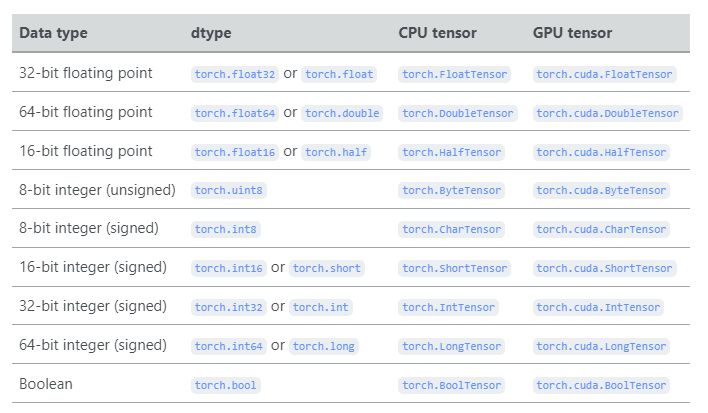
- 참조 : https://subinium.github.io/pytorch-Tensor-Variable/

In [20]:
## 데이터타입으로 '변환' 시, torch.tensor(data=arr, dtype=torch.float64)와 동일한 결과
tc2_data.type('torch.DoubleTensor')

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], dtype=torch.float64)

##### 텐서 구조, 상태 확인
- tensor.shape, tensor.size() : 텐서의 크기
- tensor.dtype, tensor.type() : 텐서의 데이터타입 확인
    - dtype 데이터 타입, type() 객체의 클래스 타입
- tensor.ndim, tensor.dim() - 텐서의 차원
- tensor.numel() : 전체 원소의 개수

In [21]:
tns1_data = torch.tensor([1,3,5,7,9])
tns1_data

tensor([1, 3, 5, 7, 9])

In [22]:
tns2_data = torch.tensor([[1,2,3,4],[5,6,7,8]])
tns2_data

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [37]:
# 넘파이로 3차원 생성
tns3_data = torch.tensor(np.arange(27).reshape(3, 3, 3))
tns3_data

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]], dtype=torch.int32)

In [38]:
# 원소개수
print(f'Vector num = {tns1_data.numel()}\nMatrix num = {tns2_data.numel()}\nTensor num = {tns3_data.numel()}\n')

Vector num = 5
Matrix num = 8
Tensor num = 27



In [41]:
# 차원 확인
tns1_data.ndim, tns2_data.ndim, tns3_data.ndim

(1, 2, 3)

In [44]:
# 위와 동일
tns1_data.dim(), tns2_data.dim(), tns3_data.dim()

(1, 2, 3)

In [45]:
# 데이터 타입 확인
tns1_data.dtype, tns2_data.dtype, tns3_data.dtype

(torch.int64, torch.int64, torch.int32)

In [46]:
# 클래스 객체 타입 확인
tns1_data.type(), tns2_data.type(), tns3_data.type()

('torch.LongTensor', 'torch.LongTensor', 'torch.IntTensor')

In [47]:
# 데이터 크기
tns1_data.shape, tns2_data.shape, tns3_data.shape

(torch.Size([5]), torch.Size([2, 4]), torch.Size([3, 3, 3]))

In [51]:
## zeros
torch.zeros(2, 4), torch.ones(2, 4)

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.]]))

In [52]:
torch.zeros(3, 3, 3), torch.ones(3, 3, 3)

(tensor([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]),
 tensor([[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]))

In [54]:
# 파이썬 리스트의 인덱싱, 슬라이싱 전부 가능
tns2_data[0][1:3]

tensor([2, 3])

In [55]:
# 행렬합
x1 = torch.tensor([[1,2,3], [4,5,6]])
x2 = torch.tensor([[1,2,3], [4,5,6]])
torch.add(x1, x2)

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])

In [56]:
# 행렬곱
torch.mul(x1, x2)

tensor([[ 1,  4,  9],
        [16, 25, 36]])

In [57]:
# 매트릭스연산, 첫 번째 매트릭스 열 크기와 두 번째 매트릭스 행 크기가 일치
x3 = torch.tensor([[1,2], [3,4], [5,6]])
torch.mm(x1, x3)

tensor([[22, 28],
        [49, 64]])

##### CPU 메모리에서 GPU 메모리로 데이터 전달

In [58]:
## 현재의 데이터가 어디 메모리에 있는지
x3.device

device(type='cpu')

In [65]:
## CPU 디바이스 = 'cpu'
cpu = torch.device('cpu')

In [66]:
## GPU 디바이스 = 'cuda'
gpu = torch.device('cuda')

In [67]:
x3

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [68]:
x4 = x3.to(gpu)
x4

tensor([[1, 2],
        [3, 4],
        [5, 6]], device='cuda:0')

In [69]:
x5 = x4.to(cpu)
x5

tensor([[1, 2],
        [3, 4],
        [5, 6]])

- 아직도 텐서와 기본 함수가 엄청 많음! 앞으로 계속 공부하자!!